In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [10]:
# Read data files
central = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'Central Region (2)')
east = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'East Region')
north_central = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Central')
north_coastal = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Costal')
north_inland = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'North Inland')
south = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/Data-Processed-Date/Regions-By-Date.xlsx', header = None, sheet_name = 'South Region')

# Set headers
central.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
east.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
north_central.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
north_coastal.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
north_inland.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']
south.columns = ['Case Count (Raw)', 'Total Rate (Suppressed)', 'Date', 'Diff']

# Transform data to datetime format
central['Date'] = pd.to_datetime(central['Date'])
east['Date'] = pd.to_datetime(east['Date'])
north_central['Date'] = pd.to_datetime(north_central['Date'])
north_coastal['Date'] = pd.to_datetime(north_coastal['Date'])
north_inland['Date'] = pd.to_datetime(north_inland['Date'])
south['Date'] = pd.to_datetime(south['Date'])

In [11]:
# Susceptible, Exposed, Infected_Symptomatic, Infected_Asymptomatic, Recovered
init_pop = {
    'Central_High': [234144, 1, 1, 1, 0], # assuming the 1st E, I, A begin from Central region
    'Central_Low': [277516, 0, 0, 0, 0],
    'East_High': [249102, 0, 0, 0, 0],
    'East_Low': [239228, 0, 0, 0, 0],
    'North_Central_High': [175301, 0, 0, 0, 0],
    'North_Central_Low': [471079, 0, 0, 0, 0],
    'North_Coastal_High': [159507, 0, 0, 0, 0],
    'North_Coastal_Low': [375712, 0, 0, 0, 0],
    'North_Inland_High': [195235, 0, 0, 0, 0],
    'North_Inland_Low': [406765, 0, 0, 0, 0],
    'South_High': [212538, 0, 0, 0, 0],
    'South_Low': [287538, 0, 0, 0, 0]
}

In [12]:
# Extracting the initial conditions from above

# Central High Risk
S_H_C_0, E_H_C_0, I_H_C_0, A_H_C_0, R_H_C_0 = init_pop['Central_High'][0],\
                                    init_pop['Central_High'][1],\
                                    init_pop['Central_High'][2],\
                                    init_pop['Central_High'][3],\
                                    init_pop['Central_High'][4]

# Central Low Risk
S_L_C_0, E_L_C_0, I_L_C_0, A_L_C_0, R_L_C_0 = init_pop['Central_Low'][0],\
                                    init_pop['Central_Low'][1],\
                                    init_pop['Central_Low'][2],\
                                    init_pop['Central_Low'][3],\
                                    init_pop['Central_Low'][4]

# East High Risk
S_H_E_0, E_H_E_0, I_H_E_0, A_H_E_0, R_H_E_0 = init_pop['East_High'][0],\
                                    init_pop['East_High'][1],\
                                    init_pop['East_High'][2],\
                                    init_pop['East_High'][3],\
                                    init_pop['East_High'][4]

# East Low Risk
S_L_E_0, E_L_E_0, I_L_E_0, A_L_E_0, R_L_E_0 = init_pop['East_Low'][0],\
                                    init_pop['East_Low'][1],\
                                    init_pop['East_Low'][2],\
                                    init_pop['East_Low'][3],\
                                    init_pop['East_Low'][4]

# North Central High Risk
S_H_NCen_0, E_H_NCen_0, I_H_NCen_0, A_H_NCen_0, R_H_NCen_0 = init_pop['North_Central_High'][0],\
                                                   init_pop['North_Central_High'][1],\
                                                   init_pop['North_Central_High'][2],\
                                                   init_pop['North_Central_High'][3],\
                                                   init_pop['North_Central_High'][4]

# North Central Low Risk
S_L_NCen_0, E_L_NCen_0, I_L_NCen_0, A_L_NCen_0, R_L_NCen_0 =  init_pop['North_Central_Low'][0],\
                                                    init_pop['North_Central_Low'][1],\
                                                    init_pop['North_Central_Low'][2],\
                                                    init_pop['North_Central_Low'][3],\
                                                    init_pop['North_Central_Low'][4]

# North Coastal High Risk
S_H_NCoa_0, E_H_NCoa_0, I_H_NCoa_0, A_H_NCoa_0, R_H_NCoa_0 =  init_pop['North_Coastal_High'][0],\
                                                    init_pop['North_Coastal_High'][1],\
                                                    init_pop['North_Coastal_High'][2],\
                                                    init_pop['North_Coastal_High'][3],\
                                                    init_pop['North_Coastal_High'][4]

# North Coastal Low Risk
S_L_NCoa_0, E_L_NCoa_0, I_L_NCoa_0, A_L_NCoa_0, R_L_NCoa_0 =  init_pop['North_Coastal_Low'][0],\
                                                    init_pop['North_Coastal_Low'][1],\
                                                    init_pop['North_Coastal_Low'][2],\
                                                    init_pop['North_Coastal_Low'][3],\
                                                    init_pop['North_Coastal_Low'][4]

# North Inland High Risk
S_H_NI_0, E_H_NI_0, I_H_NI_0, A_H_NI_0, R_H_NI_0 =  init_pop['North_Inland_High'][0],\
                                          init_pop['North_Inland_High'][1],\
                                          init_pop['North_Inland_High'][2],\
                                          init_pop['North_Inland_High'][3],\
                                          init_pop['North_Inland_High'][4]

# North Inland Low Risk
S_L_NI_0, E_L_NI_0, I_L_NI_0, A_L_NI_0, R_L_NI_0 =  init_pop['North_Inland_Low'][1],\
                                          init_pop['North_Inland_Low'][1],\
                                          init_pop['North_Inland_Low'][2],\
                                          init_pop['North_Inland_Low'][3],\
                                          init_pop['North_Inland_Low'][4]

# South High Risk
S_H_S_0, E_H_S_0, I_H_S_0, A_H_S_0, R_H_S_0 = init_pop['South_High'][0],\
                                    init_pop['South_High'][1],\
                                    init_pop['South_High'][2],\
                                    init_pop['South_High'][3],\
                                    init_pop['South_High'][4]

# South Low Risk
S_L_S_0, E_L_S_0, I_L_S_0, A_L_S_0, R_L_S_0 = init_pop['South_Low'][0],\
                                    init_pop['South_Low'][1],\
                                    init_pop['South_Low'][2],\
                                    init_pop['South_Low'][3],\
                                    init_pop['South_Low'][4]

### Function for Discrete Stochastic SEIAR Model

In [13]:
# Assumed parameters -> modified based on the situation
param_dict = {
    'High': [0.4e-6, 0.2e-6, 1/5, 0.4, 1/14, 0.001],
    'Low': [0.4e-6, 0.2e-6, 1/5, 0.4, 1/14, 0.001],
}

gamma = param_dict['High'][2] # 1/gamma = incubation period (per day)
theta = param_dict['High'][3] # theta = proportion of showing symptoms (sympomatic rate) (per day)
lamb = param_dict['High'][4] # 1/lambda = infectious period (per day)
delta = param_dict['High'][5] # death rate (per day)

In [37]:
def SEIAR_model_modified(S_H_C_init, E_H_C_init, I_H_C_init, A_H_C_init, R_H_C_init, S_L_C_init, E_L_C_init, I_L_C_init, A_L_C_init, R_L_C_init,\
               S_H_E_init, E_H_E_init, I_H_E_init, A_H_E_init, R_H_E_init, S_L_E_init, E_L_E_init, I_L_E_init, A_L_E_init, R_L_E_init,\
               S_H_NCen_init, E_H_NCen_init, I_H_NCen_init, A_H_NCen_init, R_H_NCen_init, S_L_NCen_init, E_L_NCen_init, I_L_NCen_init, A_L_NCen_init, R_L_NCen_init,\
               S_H_NCoa_init, E_H_NCoa_init, I_H_NCoa_init, A_H_NCoa_init, R_H_NCoa_init, S_L_NCoa_init, E_L_NCoa_init, I_L_NCoa_init, A_L_NCoa_init, R_L_NCoa_init,\
               S_H_NI_init, E_H_NI_init, I_H_NI_init, A_H_NI_init, R_H_NI_init, S_L_NI_init, E_L_NI_init, I_L_NI_init, A_L_NI_init, R_L_NI_init,\
               S_H_S_init, E_H_S_init, I_H_S_init, A_H_S_init, R_H_S_init, S_L_S_init, E_L_S_init, I_L_S_init, A_L_S_init, R_L_S_init, \
               beta_sym, beta_asym, gamma, theta, lamb, delta, frac):
   
    '''
    Use the SEIAR model to predict the number of people in each compartment at each time step.
    The MC simulation estimates the mean of the number of people in each compartment at each time step.
    ------------------------------------------------------------------------------------------
    Input:
        Initial population in each compartment (line 1-6)
        beta_sym: transmission rate of symptomatic individuals -> to be calibrated
        beta_asym: transmission rate of asymptomatic individuals -> to be calibrated
        gamma: rate of recovery
        theta: rate of progression from exposed to infectious
        lamb: rate of progression from infectious to asymptomatic
        delta: rate of progression from asymptomatic to recovered
    
    Output:
        Populations for SEIAR from each region
    '''

    # Simulation length (in days)
    t = 214
    
    # Initialise arrays to store populations
    C_H = np.zeros((t+1, 5))
    C_L = np.zeros((t+1, 5))

    E_H = np.zeros((t+1, 5))
    E_L = np.zeros((t+1, 5))

    NCen_H = np.zeros((t+1, 5))
    NCen_L = np.zeros((t+1, 5))

    NCoa_H = np.zeros((t+1, 5))
    NCoa_L = np.zeros((t+1, 5))

    NI_H = np.zeros((t+1, 5))
    NI_L = np.zeros((t+1, 5))

    S_H = np.zeros((t+1, 5))
    S_L = np.zeros((t+1, 5))

    # Initial Conditions
    C_H[0][0], C_H[0][1], C_H[0][2], C_H[0][3], C_H[0][4] = S_H_C_init, E_H_C_init, I_H_C_init, A_H_C_init, R_H_C_init
    C_L[0][0], C_L[0][1], C_L[0][2], C_L[0][3], C_L[0][4] = S_L_C_init, E_L_C_init, I_L_C_init, A_L_C_init, R_L_C_init

    E_H[0][0], E_H[0][1], E_H[0][2], E_H[0][3], E_H[0][4] = S_H_E_init, E_H_E_init, I_H_E_init, A_H_E_init, R_H_E_init
    E_L[0][0], E_L[0][1], E_L[0][2], E_L[0][3], E_L[0][4] = S_L_E_init, E_L_E_init, I_L_E_init, A_L_E_init, R_L_E_init

    NCen_H[0][0], NCen_H[0][1], NCen_H[0][2], NCen_H[0][3], NCen_H[0][4] = S_H_NCen_init, E_H_NCen_init, I_H_NCen_init, A_H_NCen_init, R_H_NCen_init
    NCen_L[0][0], NCen_L[0][1], NCen_L[0][2], NCen_L[0][3], NCen_L[0][4] = S_L_NCen_init, E_L_NCen_init, I_L_NCen_init, A_L_NCen_init, R_L_NCen_init

    NCoa_H[0][0], NCoa_H[0][1], NCoa_H[0][2], NCoa_H[0][3], NCoa_H[0][4] = S_H_NCoa_init, E_H_NCoa_init, I_H_NCoa_init, A_H_NCoa_init, R_H_NCoa_init
    NCoa_L[0][0], NCoa_L[0][1], NCoa_L[0][2], NCoa_L[0][3], NCoa_L[0][4] = S_L_NCoa_init, E_L_NCoa_init, I_L_NCoa_init, A_L_NCoa_init, R_L_NCoa_init

    NI_H[0][0], NI_H[0][1], NI_H[0][2], NI_H[0][3], NI_H[0][4] = S_H_NI_init, E_H_NI_init, I_H_NI_init, A_H_NI_init, R_H_NI_init
    NI_L[0][0], NI_L[0][1], NI_L[0][2], NI_L[0][3], NI_L[0][4] = S_L_NI_init, E_L_NI_init, I_L_NI_init, A_L_NI_init, R_L_NI_init

    S_H[0][0], S_H[0][1], S_H[0][2], S_H[0][3], S_H[0][4] = S_H_S_init, E_H_S_init, I_H_S_init, A_H_S_init, R_H_S_init
    S_L[0][0], S_L[0][1], S_L[0][2], S_L[0][3], S_L[0][4] = S_L_S_init, E_L_S_init, I_L_S_init, A_L_S_init, R_L_S_init

    # Initialise populations
    S_H_C, E_H_C, I_H_C, A_H_C, R_H_C = S_H_C_init, E_H_C_init, I_H_C_init, A_H_C_init, R_H_C_init
    S_L_C, E_L_C, I_L_C, A_L_C, R_L_C = S_L_C_init, E_L_C_init, I_L_C_init, A_L_C_init, R_L_C_init

    S_H_E, E_H_E, I_H_E, A_H_E, R_H_E = S_H_E_init, E_H_E_init, I_H_E_init, A_H_E_init, R_H_E_init
    S_L_E, E_L_E, I_L_E, A_L_E, R_L_E = S_L_E_init, E_L_E_init, I_L_E_init, A_L_E_init, R_L_E_init

    S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen = S_H_NCen_init, E_H_NCen_init, I_H_NCen_init, A_H_NCen_init, R_H_NCen_init
    S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen = S_L_NCen_init, E_L_NCen_init, I_L_NCen_init, A_L_NCen_init, R_L_NCen_init

    S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa = S_H_NCoa_init, E_H_NCoa_init, I_H_NCoa_init, A_H_NCoa_init, R_H_NCoa_init
    S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa = S_L_NCoa_init, E_L_NCoa_init, I_L_NCoa_init, A_L_NCoa_init, R_L_NCoa_init

    S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI = S_H_NI_init, E_H_NI_init, I_H_NI_init, A_H_NI_init, R_H_NI_init
    S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI = S_L_NI_init, E_L_NI_init, I_L_NI_init, A_L_NI_init, R_L_NI_init

    S_H_S, E_H_S, I_H_S, A_H_S, R_H_S = S_H_S_init, E_H_S_init, I_H_S_init, A_H_S_init, R_H_S_init
    S_L_S, E_L_S, I_L_S, A_L_S, R_L_S = S_L_S_init, E_L_S_init, I_L_S_init, A_L_S_init, R_L_S_init


    mob_central_dict = {

        'East': [2518.007912, 1179.226414, 2302.018371], \
        'North_Central': [5431.723516, 1940.995073, 4336.156366], \
        'North_Coastal': [410.088803, 224.745859, 654.88667], \
        'North_Inland': [664.540636, 366.97859, 588.297201], \
        'South': [3640.640873, 1626.007515, 2917.389471]

    }

    mob_east_dict = {

        'Central': [3768.837284, 1440.608412, 2866.137454], \
        'North_Central': [5425.003638, 1919.445416, 4670.294659], \
        'North_Coastal': [483.573126, 191.392576, 473.906442], \
        'North_Inland': [1055.682996, 484.299215, 842.685923], \
        'South': [2488.03862, 980.052445, 2087.730478]

    }

    mob_north_central_dict = {

        'Central': [3657.897354, 1054.592602, 3087.41847], \
        'East': [2111.999373, 871.361025, 2093.514868], \
        'North_Coastal': [1656.53273, 460.539775, 1724.08199], \
        'North_Inland': [2767.349274, 983.942653, 2341.094009], \
        'South': [1257.405478, 596.794501, 1182.745383]

    }

    mob_north_coastal_dict = {

        'Central': [780.166594, 156.644603, 1196.23607], \
        'East': [246.915804, 115.929512, 226.261725], \
        'North_Central': [2547.496323, 631.995693, 1936.045114], \
        'North_Inland': [3898.342286, 1414.099677, 3053.434645], \
        'South': [258.826212, 133.157868, 306.770863]

    }

    mob_north_inland_dict = {

        'Central': [1507.037202, 392.630209, 1305.236506], \
        'East': [1000.642647, 390.292827, 879.488701], \
        'North_Central': [6136.233626, 1687.503238, 4745.989662], \
        'North_Coastal': [5256.002028, 1827.728619, 4981.44469], \
        'South': [607.446061, 255.851188, 534.272639]

    }

    mob_south_dict = {

        'Central': [4053.532554, 1545.91116, 2984.388535], \
        'East': [1970.762799, 828.927306, 1716.573243], \
        'North_Central': [3883.18689, 1374.748533, 3361.535465], \
        'North_Coastal': [391.417326, 147.78653, 331.027812], \
        'North_Inland': [622.229053, 262.674827, 511.746844]

    }

    # Mobility changes for 3 phases -> refer to ./Data/Mobility.ipynb
    for day in range(1, t+1):

        if day <= 70:
            
            # Retrieve mobility changes for each region
            mob_central_east = frac * mob_central_dict['East'][0] / 511660
            mob_central_north_central = frac * mob_central_dict['North_Central'][0] / 511660
            mob_central_north_coastal = frac * mob_central_dict['North_Coastal'][0] / 511660
            mob_central_north_inland = frac * mob_central_dict['North_Inland'][0] / 511660
            mob_central_south = frac * mob_central_dict['South'][0] / 511660

            mob_east_central = frac * mob_east_dict['Central'][0] / 488330
            mob_east_north_central = frac * mob_east_dict['North_Central'][0] / 488330
            mob_east_north_coastal = frac * mob_east_dict['North_Coastal'][0] / 488330
            mob_east_north_inland = frac * mob_east_dict['North_Inland'][0] / 488330
            mob_east_south = frac * mob_east_dict['South'][0] / 488330

            mob_north_central_central = frac * mob_north_central_dict['Central'][0] / 646380
            mob_north_central_east = frac * mob_north_central_dict['East'][0] / 646380
            mob_north_central_north_coastal = frac * mob_north_central_dict['North_Coastal'][0] / 646380
            mob_north_central_north_inland = frac * mob_north_central_dict['North_Inland'][0] / 646380
            mob_north_central_south = frac * mob_north_central_dict['South'][0] / 646380

            mob_north_coastal_central = frac * mob_north_coastal_dict['Central'][0] / 535219
            mob_north_coastal_east = frac * mob_north_coastal_dict['East'][0] / 535219
            mob_north_coastal_north_central = frac * mob_north_coastal_dict['North_Central'][0] / 535219
            mob_north_coastal_north_inland = frac * mob_north_coastal_dict['North_Inland'][0] / 535219
            mob_north_coastal_south = frac * mob_north_coastal_dict['South'][0] / 535219

            mob_north_inland_central = frac * mob_north_inland_dict['Central'][0] / 602000
            mob_north_inland_east = frac * mob_north_inland_dict['East'][0] / 602000
            mob_north_inland_north_central = frac * mob_north_inland_dict['North_Central'][0] / 602000
            mob_north_inland_north_coastal = frac * mob_north_inland_dict['North_Coastal'][0] / 602000
            mob_north_inland_south = frac * mob_north_inland_dict['South'][0] / 602000

            mob_south_central = frac * mob_south_dict['Central'][0] / 500076
            mob_south_east = frac * mob_south_dict['East'][0] / 500076
            mob_south_north_central = frac * mob_south_dict['North_Central'][0] / 500076
            mob_south_north_coastal = frac * mob_south_dict['North_Coastal'][0] / 500076
            mob_south_north_inland = frac * mob_south_dict['North_Inland'][0] / 500076
           
        elif day > 70 and day <= 80:

            # Same as above
            mob_central_east = frac * mob_central_dict['East'][1] / 511660
            mob_central_north_central = frac * mob_central_dict['North_Central'][1] / 511660
            mob_central_north_coastal = frac * mob_central_dict['North_Coastal'][1] / 511660
            mob_central_north_inland = frac * mob_central_dict['North_Inland'][1] / 511660
            mob_central_south = frac * mob_central_dict['South'][1] / 511660

            mob_east_central = frac * mob_east_dict['Central'][1] / 488330
            mob_east_north_central = frac * mob_east_dict['North_Central'][1] / 488330
            mob_east_north_coastal = frac * mob_east_dict['North_Coastal'][1] / 488330
            mob_east_north_inland = frac * mob_east_dict['North_Inland'][1] / 488330
            mob_east_south = frac * mob_east_dict['South'][1] / 488330

            mob_north_central_central = frac * mob_north_central_dict['Central'][1] / 646380
            mob_north_central_east = frac * mob_north_central_dict['East'][1] / 646380
            mob_north_central_north_coastal = frac * mob_north_central_dict['North_Coastal'][1] / 646380
            mob_north_central_north_inland = frac * mob_north_central_dict['North_Inland'][1] / 646380
            mob_north_central_south = frac * mob_north_central_dict['South'][1] / 646380

            mob_north_coastal_central = frac * mob_north_coastal_dict['Central'][1] / 535219
            mob_north_coastal_east = frac * mob_north_coastal_dict['East'][1] / 535219
            mob_north_coastal_north_central = frac * mob_north_coastal_dict['North_Central'][1] / 535219
            mob_north_coastal_north_inland = frac * mob_north_coastal_dict['North_Inland'][1] / 535219
            mob_north_coastal_south = frac * mob_north_coastal_dict['South'][1] / 535219

            mob_north_inland_central = frac * mob_north_inland_dict['Central'][1] / 602000
            mob_north_inland_east = frac * mob_north_inland_dict['East'][1] / 602000
            mob_north_inland_north_central = frac * mob_north_inland_dict['North_Central'][1] / 602000
            mob_north_inland_north_coastal = frac * mob_north_inland_dict['North_Coastal'][1] / 602000
            mob_north_inland_south = frac * mob_north_inland_dict['South'][1] / 602000

            mob_south_central = frac * mob_south_dict['Central'][1] / 500076
            mob_south_east = frac * mob_south_dict['East'][1] / 500076
            mob_south_north_central = frac * mob_south_dict['North_Central'][1] / 500076
            mob_south_north_coastal = frac * mob_south_dict['North_Coastal'][1] / 500076
            mob_south_north_inland = frac * mob_south_dict['North_Inland'][1] / 500076

        else:

            # Same as above
            mob_central_east = frac * mob_central_dict['East'][2] / 511660
            mob_central_north_central = frac * mob_central_dict['North_Central'][2] / 511660
            mob_central_north_coastal = frac * mob_central_dict['North_Coastal'][2] / 511660
            mob_central_north_inland = frac * mob_central_dict['North_Inland'][2] / 511660
            mob_central_south = frac * mob_central_dict['South'][2] / 511660

            mob_east_central = frac * mob_east_dict['Central'][2] / 488330
            mob_east_north_central = frac * mob_east_dict['North_Central'][2] / 488330
            mob_east_north_coastal = frac * mob_east_dict['North_Coastal'][2] / 488330
            mob_east_north_inland = frac * mob_east_dict['North_Inland'][2] / 488330
            mob_east_south = frac * mob_east_dict['South'][2] / 488330

            mob_north_central_central = frac * mob_north_central_dict['Central'][2] / 646380
            mob_north_central_east = frac * mob_north_central_dict['East'][2] / 646380
            mob_north_central_north_coastal = frac * mob_north_central_dict['North_Coastal'][2] / 646380
            mob_north_central_north_inland = frac * mob_north_central_dict['North_Inland'][2] / 646380
            mob_north_central_south = frac * mob_north_central_dict['South'][2] / 646380

            mob_north_coastal_central = frac * mob_north_coastal_dict['Central'][2] / 535219
            mob_north_coastal_east = frac * mob_north_coastal_dict['East'][2] / 535219
            mob_north_coastal_north_central = frac * mob_north_coastal_dict['North_Central'][2] / 535219
            mob_north_coastal_north_inland = frac * mob_north_coastal_dict['North_Inland'][2] / 535219
            mob_north_coastal_south = frac * mob_north_coastal_dict['South'][2] / 535219

            mob_north_inland_central = frac * mob_north_inland_dict['Central'][2] / 602000
            mob_north_inland_east = frac * mob_north_inland_dict['East'][2] / 602000
            mob_north_inland_north_central = frac * mob_north_inland_dict['North_Central'][2] / 602000
            mob_north_inland_north_coastal = frac * mob_north_inland_dict['North_Coastal'][2] / 602000
            mob_north_inland_south = frac * mob_north_inland_dict['South'][2] / 602000

            mob_south_central = frac * mob_south_dict['Central'][2] / 500076
            mob_south_east = frac * mob_south_dict['East'][2] / 500076
            mob_south_north_central = frac * mob_south_dict['North_Central'][2] / 500076
            mob_south_north_coastal = frac * mob_south_dict['North_Coastal'][2] / 500076
            mob_south_north_inland = frac * mob_south_dict['North_Inland'][2] / 500076

        
        # Compute Monte Carlo simulation using biniomial distribution
        # n = initial population, p = probability of event from the model
        Central_High = {'S_to_E': np.random.binomial(S_H_C, (beta_sym['Central'] * (I_H_C + I_L_C)) + (beta_asym['Central'] * (A_H_C + A_L_C))),
                        'E_to_I': np.random.binomial(E_H_C, gamma*theta),
                        'E_to_A': np.random.binomial(E_H_C, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_H_C, delta + lamb),
                        'A_to_R': np.random.binomial(A_H_C, delta) }

        Central_Low = { 'S_to_E': np.random.binomial(S_L_C, (beta_sym['Central'] * (I_H_C + I_L_C)) + (beta_asym['Central'] * (A_H_C + A_L_C))),
                        'E_to_I': np.random.binomial(E_L_C, gamma*theta),
                        'E_to_A': np.random.binomial(E_L_C, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_L_C, delta + lamb),
                        'A_to_R': np.random.binomial(A_L_C, delta) }

        East_High = { 'S_to_E': np.random.binomial(S_H_E, (beta_sym['East'] * (I_H_E + I_L_E)) + (beta_asym['East'] * (A_H_E + A_L_E))),
                      'E_to_I': np.random.binomial(E_H_E, gamma*theta),
                      'E_to_A': np.random.binomial(E_H_E, gamma*(1-theta)),
                      'I_to_R': np.random.binomial(I_H_E, delta + lamb),
                      'A_to_R': np.random.binomial(A_H_E, delta) }

        East_Low = {    'S_to_E': np.random.binomial(S_L_E, (beta_sym['East'] * (I_H_E + I_L_E)) + (beta_asym['East'] * (A_H_E + A_L_E))),
                        'E_to_I': np.random.binomial(E_L_E, gamma*theta),
                        'E_to_A': np.random.binomial(E_L_E, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_L_E, delta + lamb),
                        'A_to_R': np.random.binomial(A_L_E, delta) }
        
        North_Central_High = {  'S_to_E': np.random.binomial(S_H_NCen, (beta_sym['North Central'] * (I_H_NCen + I_L_NCen)) + (beta_asym['North Central'] * (A_H_NCen + A_L_NCen))),
                                'E_to_I': np.random.binomial(E_H_NCen, gamma*theta),
                                'E_to_A': np.random.binomial(E_H_NCen, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_H_NCen, delta + lamb),
                                'A_to_R': np.random.binomial(A_H_NCen, delta) }
        
        North_Central_Low = {   'S_to_E': np.random.binomial(S_L_NCen, (beta_sym['North Central'] * (I_H_NCen + I_L_NCen) + (beta_asym['North Central'] * (A_H_NCen + A_L_NCen)))),
                                'E_to_I': np.random.binomial(E_L_NCen, gamma*theta),
                                'E_to_A': np.random.binomial(E_L_NCen, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_L_NCen, delta + lamb),
                                'A_to_R': np.random.binomial(A_L_NCen, delta) }

        North_Coastal_High = {  'S_to_E': np.random.binomial(S_H_NCoa, (beta_sym['North Coastal'] * (I_H_NCoa + I_L_NCoa)) + (beta_asym['North Coastal'] * (A_H_NCoa + A_L_NCoa))),
                                'E_to_I': np.random.binomial(E_H_NCoa, gamma*theta),
                                'E_to_A': np.random.binomial(E_H_NCoa, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_H_NCoa, delta + lamb),
                                'A_to_R': np.random.binomial(A_H_NCoa, delta) }
        
        North_Coastal_Low = {   'S_to_E': np.random.binomial(S_L_NCoa, (beta_sym['North Coastal'] * (I_H_NCoa + I_L_NCoa)) + (beta_asym['North Coastal'] * (A_H_NCoa + A_L_NCoa))),
                                'E_to_I': np.random.binomial(E_L_NCoa, gamma*theta),
                                'E_to_A': np.random.binomial(E_L_NCoa, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_L_NCoa, delta + lamb),
                                'A_to_R': np.random.binomial(A_L_NCoa, delta) }
        
        North_Inland_High = {   'S_to_E': np.random.binomial(S_H_NI, (beta_sym['North Inland'] * (I_H_NI + I_L_NI)) + (beta_asym['North Inland'] * (A_H_NI + A_L_NI))),
                                'E_to_I': np.random.binomial(E_H_NI, gamma*theta),
                                'E_to_A': np.random.binomial(E_H_NI, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_H_NI, delta + lamb),
                                'A_to_R': np.random.binomial(A_H_NI, delta) }

        North_Inland_Low = {    'S_to_E': np.random.binomial(S_L_NI, (beta_sym['North Inland'] * (I_H_NI + I_L_NI)) + (beta_asym['North Inland'] * (A_H_NI + A_L_NI))),
                                'E_to_I': np.random.binomial(E_L_NI, gamma*theta),
                                'E_to_A': np.random.binomial(E_L_NI, gamma*(1-theta)),
                                'I_to_R': np.random.binomial(I_L_NI, delta + lamb),
                                'A_to_R': np.random.binomial(A_L_NI, delta) }
        
        South_High = {  'S_to_E': np.random.binomial(S_H_S, (beta_sym['South'] * (I_H_S + I_L_S)) + (beta_asym['South'] * (A_H_S + A_L_S))),
                        'E_to_I': np.random.binomial(E_H_S, gamma*theta),
                        'E_to_A': np.random.binomial(E_H_S, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_H_S, delta + lamb),
                        'A_to_R': np.random.binomial(A_H_S, delta) }

        South_Low = {   'S_to_E': np.random.binomial(S_L_S, (beta_sym['South'] * (I_H_S + I_L_S)) + (beta_asym['South'] * (A_H_S + A_L_S))),
                        'E_to_I': np.random.binomial(E_L_S, gamma*theta),
                        'E_to_A': np.random.binomial(E_L_S, gamma*(1-theta)),
                        'I_to_R': np.random.binomial(I_L_S, delta + lamb),
                        'A_to_R': np.random.binomial(A_L_S, delta) }
                                
        # Update populations for SEAIR
        # np.max is used to ensure that the population does not go negative
        Central_High_S_new = np.max(S_H_C - Central_High['S_to_E'] + \
            (mob_east_central*S_H_E) + (mob_north_central_central*S_H_NCen) + (mob_north_coastal_central*S_H_NCoa) + (mob_north_inland_central*S_H_NI) + (mob_south_central*S_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* S_H_C), \
            0)
        Central_High_E_new = np.max(E_H_C + Central_High['S_to_E'] - Central_High['E_to_I'] - Central_High['E_to_A'] + \
            (mob_east_central*E_H_E) + (mob_north_central_central*E_H_NCen) + (mob_north_coastal_central*E_H_NCoa) + (mob_north_inland_central*E_H_NI) + (mob_south_central*E_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* E_H_C), \
            0)
        Central_High_I_new = np.max(I_H_C + Central_High['E_to_I'] - Central_High['I_to_R'] + \
            (mob_east_central*I_H_E) + (mob_north_central_central*I_H_NCen) + (mob_north_coastal_central*I_H_NCoa) + (mob_north_inland_central*I_H_NI) + (mob_south_central*I_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* I_H_C), \
            0)
        Central_High_A_new = np.max(A_H_C + Central_High['E_to_A'] - Central_High['A_to_R'] + \
            (mob_east_central*A_H_E) + (mob_north_central_central*A_H_NCen) + (mob_north_coastal_central*A_H_NCoa) + (mob_north_inland_central*A_H_NI) + (mob_south_central*A_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* A_H_C), \
            0)
        Central_High_R_new = np.max(R_H_C + Central_High['I_to_R'] + Central_High['A_to_R'] + \
            (mob_east_central*R_H_E) + (mob_north_central_central*R_H_NCen) + (mob_north_coastal_central*R_H_NCoa) + (mob_north_inland_central*R_H_NI) + (mob_south_central*R_H_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* R_H_C), \
            0)

        Central_Low_S_new = np.max(S_L_C - Central_Low['S_to_E'] + \
            (mob_east_central*S_L_E) + (mob_north_central_central*S_L_NCen) + (mob_north_coastal_central*S_L_NCoa) + (mob_north_inland_central*S_L_NI) + (mob_south_central*S_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* S_L_C), \
            0)
        Central_Low_E_new = np.max(E_L_C + Central_Low['S_to_E'] - Central_Low['E_to_I'] - Central_Low['E_to_A'] + \
            (mob_east_central*E_L_E) + (mob_north_central_central*E_L_NCen) + (mob_north_coastal_central*E_L_NCoa) + (mob_north_inland_central*E_L_NI) + (mob_south_central*E_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* E_L_C), \
            0)
        Central_Low_I_new = np.max(I_L_C + Central_Low['E_to_I'] - Central_Low['I_to_R'] + \
            (mob_east_central*I_L_E) + (mob_north_central_central*I_L_NCen) + (mob_north_coastal_central*I_L_NCoa) + (mob_north_inland_central*I_L_NI) + (mob_south_central*I_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* I_L_C), \
            0)
        Central_Low_A_new = np.max(A_L_C + Central_Low['E_to_A'] - Central_Low['A_to_R'] + \
            (mob_east_central*A_L_E) + (mob_north_central_central*A_L_NCen) + (mob_north_coastal_central*A_L_NCoa) + (mob_north_inland_central*A_L_NI) + (mob_south_central*A_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* A_L_C), \
            0)
        Central_Low_R_new = np.max(R_L_C + Central_Low['I_to_R'] + Central_Low['A_to_R'] + \
            (mob_east_central*R_L_E) + (mob_north_central_central*R_L_NCen) + (mob_north_coastal_central*R_L_NCoa) + (mob_north_inland_central*R_L_NI) + (mob_south_central*R_L_S) - \
            ((mob_central_east + mob_central_north_central + mob_central_north_coastal + mob_central_north_inland + mob_central_south)* R_L_C), \
            0)
        
        East_High_S_new = np.max(S_H_E - East_High['S_to_E'] + \
            (mob_central_east*S_H_C) + (mob_north_central_east*S_H_NCen) + (mob_north_coastal_east*S_H_NCoa) + (mob_north_inland_east*S_H_NI) + (mob_south_east*S_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * S_H_E), \
            0)
        East_High_E_new = np.max(E_H_E + East_High['S_to_E'] - East_High['E_to_I'] - East_High['E_to_A'] + \
            (mob_central_east*E_H_C) + (mob_north_central_east*E_H_NCen) + (mob_north_coastal_east*E_H_NCoa) + (mob_north_inland_east*E_H_NI) + (mob_south_east*E_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * E_H_E), \
            0)
        East_High_I_new = np.max(I_H_E + East_High['E_to_I'] - East_High['I_to_R'] + \
            (mob_central_east*I_H_C) + (mob_north_central_east*I_H_NCen) + (mob_north_coastal_east*I_H_NCoa) + (mob_north_inland_east*I_H_NI) + (mob_south_east*I_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * I_H_E), \
            0)
        East_High_A_new = np.max(A_H_E + East_High['E_to_A'] - East_High['A_to_R'] + \
            (mob_central_east*A_H_C) + (mob_north_central_east*A_H_NCen) + (mob_north_coastal_east*A_H_NCoa) + (mob_north_inland_east*A_H_NI) + (mob_south_east*A_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * A_H_E), \
            0)
        East_High_R_new = np.max(R_H_E + East_High['I_to_R'] + East_High['A_to_R'] + \
            (mob_central_east*R_H_C) + (mob_north_central_east*R_H_NCen) + (mob_north_coastal_east*R_H_NCoa) + (mob_north_inland_east*R_H_NI) + (mob_south_east*R_H_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * R_H_E), \
            0)

        East_Low_S_new = np.max(S_L_E - East_Low['S_to_E'] + \
            (mob_central_east*S_L_C) + (mob_north_central_east*S_L_NCen) + (mob_north_coastal_east*S_L_NCoa) + (mob_north_inland_east*S_L_NI) + (mob_south_east*S_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * S_L_E), \
            0)
        East_Low_E_new = np.max(E_L_E + East_Low['S_to_E'] - East_Low['E_to_I'] - East_Low['E_to_A'] + \
            (mob_central_east*E_L_C) + (mob_north_central_east*E_L_NCen) + (mob_north_coastal_east*E_L_NCoa) + (mob_north_inland_east*E_L_NI) + (mob_south_east*E_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * E_L_E), \
            0)
        East_Low_I_new = np.max(I_L_E + East_Low['E_to_I'] - East_Low['I_to_R'] + \
            (mob_central_east*I_L_C) + (mob_north_central_east*I_L_NCen) + (mob_north_coastal_east*I_L_NCoa) + (mob_north_inland_east*I_L_NI) + (mob_south_east*I_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * I_L_E), \
            0)
        East_Low_A_new = np.max(A_L_E + East_Low['E_to_A'] - East_Low['A_to_R'] + \
            (mob_central_east*A_L_C) + (mob_north_central_east*A_L_NCen) + (mob_north_coastal_east*A_L_NCoa) + (mob_north_inland_east*A_L_NI) + (mob_south_east*A_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * A_L_E), \
            0)
        East_Low_R_new = np.max(R_L_E + East_Low['I_to_R'] + East_Low['A_to_R'] + \
            (mob_central_east*R_L_C) + (mob_north_central_east*R_L_NCen) + (mob_north_coastal_east*R_L_NCoa) + (mob_north_inland_east*R_L_NI) + (mob_south_east*R_L_S) - \
            ((mob_east_central + mob_east_north_central + mob_east_north_coastal + mob_east_north_inland + mob_east_south) * R_L_E), \
            0)
        
        North_Central_High_S_new = np.max(S_H_NCen - North_Central_High['S_to_E'] + \
            (mob_central_north_central*S_H_C) + (mob_east_north_central*S_H_E) + (mob_north_coastal_north_central*S_H_NCoa) + (mob_north_inland_north_central*S_H_NI) + (mob_south_north_central*S_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * S_H_NCen), \
            0)
        North_Central_High_E_new = np.max(E_H_NCen + North_Central_High['S_to_E'] - North_Central_High['E_to_I'] - North_Central_High['E_to_A'] + \
            (mob_central_north_central*E_H_C) + (mob_east_north_central*E_H_E) + (mob_north_coastal_north_central*E_H_NCoa) + (mob_north_inland_north_central*E_H_NI) + (mob_south_north_central*E_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * E_H_NCen), \
            0)
        North_Central_High_I_new = np.max(I_H_NCen + North_Central_High['E_to_I'] - North_Central_High['I_to_R'] + \
            (mob_central_north_central*I_H_C) + (mob_east_north_central*I_H_E) + (mob_north_coastal_north_central*I_H_NCoa) + (mob_north_inland_north_central*I_H_NI) + (mob_south_north_central*I_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * I_H_NCen), \
            0)
        North_Central_High_A_new = np.max(A_H_NCen + North_Central_High['E_to_A'] - North_Central_High['A_to_R'] + \
            (mob_central_north_central*A_H_C) + (mob_east_north_central*A_H_E) + (mob_north_coastal_north_central*A_H_NCoa) + (mob_north_inland_north_central*A_H_NI) + (mob_south_north_central*A_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * A_H_NCen), \
            0)
        North_Central_High_R_new = np.max(R_H_NCen + North_Central_High['I_to_R'] + North_Central_High['A_to_R'] + \
            (mob_central_north_central*R_H_C) + (mob_east_north_central*R_H_E) + (mob_north_coastal_north_central*R_H_NCoa) + (mob_north_inland_north_central*R_H_NI) + (mob_south_north_central*R_H_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * R_H_NCen), \
            0)

        North_Central_Low_S_new = np.max(S_L_NCen - North_Central_Low['S_to_E'] + \
            (mob_central_north_central*S_L_C) + (mob_east_north_central*S_L_E) + (mob_north_coastal_north_central*S_L_NCoa) + (mob_north_inland_north_central*S_L_NI) + (mob_south_north_central*S_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * S_L_NCen), \
            0)
        North_Central_Low_E_new = np.max(E_L_NCen + North_Central_Low['S_to_E'] - North_Central_Low['E_to_I'] - North_Central_Low['E_to_A'] + \
            (mob_central_north_central*E_L_C) + (mob_east_north_central*E_L_E) + (mob_north_coastal_north_central*E_L_NCoa) + (mob_north_inland_north_central*E_L_NI) + (mob_south_north_central*E_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * E_L_NCen), \
            0)
        North_Central_Low_I_new = np.max(I_L_NCen + North_Central_Low['E_to_I'] - North_Central_Low['I_to_R'] + \
            (mob_central_north_central*I_L_C) + (mob_east_north_central*I_L_E) + (mob_north_coastal_north_central*I_L_NCoa) + (mob_north_inland_north_central*I_L_NI) + (mob_south_north_central*I_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * I_L_NCen), \
            0)
        North_Central_Low_A_new = np.max(A_L_NCen + North_Central_Low['E_to_A'] - North_Central_Low['A_to_R'] + \
            (mob_central_north_central*A_L_C) + (mob_east_north_central*A_L_E) + (mob_north_coastal_north_central*A_L_NCoa) + (mob_north_inland_north_central*A_L_NI) + (mob_south_north_central*A_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * A_L_NCen), \
            0)
        North_Central_Low_R_new = np.max(R_L_NCen + North_Central_Low['I_to_R'] + North_Central_Low['A_to_R'] + \
            (mob_central_north_central*R_L_C) + (mob_east_north_central*R_L_E) + (mob_north_coastal_north_central*R_L_NCoa) + (mob_north_inland_north_central*R_L_NI) + (mob_south_north_central*R_L_S) - \
            ((mob_north_central_central + mob_north_central_east + mob_north_central_north_coastal + mob_north_central_north_inland + mob_north_central_south) * R_L_NCen), \
            0)

        North_Coastal_High_S_new = np.max(S_H_NCoa - North_Coastal_High['S_to_E'] + \
            (mob_central_north_coastal*S_H_C) + (mob_east_north_coastal*S_H_E) + (mob_north_central_north_coastal*S_H_NCen) + (mob_north_inland_north_coastal*S_H_NI) + (mob_south_north_coastal*S_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * S_H_NCoa), \
            0)
        North_Coastal_High_E_new = np.max(E_H_NCoa + North_Coastal_High['S_to_E'] - North_Coastal_High['E_to_I'] - North_Coastal_High['E_to_A'] + \
            (mob_central_north_coastal*E_H_C) + (mob_east_north_coastal*E_H_E) + (mob_north_central_north_coastal*E_H_NCen) + (mob_north_inland_north_coastal*E_H_NI) + (mob_south_north_coastal*E_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * E_H_NCoa), \
            0)
        North_Coastal_High_I_new = np.max(I_H_NCoa + North_Coastal_High['E_to_I'] - North_Coastal_High['I_to_R'] + \
            (mob_central_north_coastal*I_H_C) + (mob_east_north_coastal*I_H_E) + (mob_north_central_north_coastal*I_H_NCen) + (mob_north_inland_north_coastal*I_H_NI) + (mob_south_north_coastal*I_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * I_H_NCoa), \
            0)
        North_Coastal_High_A_new = np.max(A_H_NCoa + North_Coastal_High['E_to_A'] - North_Coastal_High['A_to_R'] + \
            (mob_central_north_coastal*A_H_C) + (mob_east_north_coastal*A_H_E) + (mob_north_central_north_coastal*A_H_NCen) + (mob_north_inland_north_coastal*A_H_NI) + (mob_south_north_coastal*A_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * A_H_NCoa), \
            0)
        North_Coastal_High_R_new = np.max(R_H_NCoa + North_Coastal_High['I_to_R'] + North_Coastal_High['A_to_R'] + \
            (mob_central_north_coastal*R_H_C) + (mob_east_north_coastal*R_H_E) + (mob_north_central_north_coastal*R_H_NCen) + (mob_north_inland_north_coastal*R_H_NI) + (mob_south_north_coastal*R_H_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * R_H_NCoa), \
            0)

        North_Coastal_Low_S_new = np.max(S_L_NCoa - North_Coastal_Low['S_to_E'] + \
            (mob_central_north_coastal*S_L_C) + (mob_east_north_coastal*S_L_E) + (mob_north_central_north_coastal*S_L_NCen) + (mob_north_inland_north_coastal*S_L_NI) + (mob_south_north_coastal*S_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * S_L_NCoa), \
            0)
        North_Coastal_Low_E_new = np.max(E_L_NCoa + North_Coastal_Low['S_to_E'] - North_Coastal_Low['E_to_I'] - North_Coastal_Low['E_to_A'] + \
            (mob_central_north_coastal*E_L_C) + (mob_east_north_coastal*E_L_E) + (mob_north_central_north_coastal*E_L_NCen) + (mob_north_inland_north_coastal*E_L_NI) + (mob_south_north_coastal*E_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * E_L_NCoa), \
            0)
        North_Coastal_Low_I_new = np.max(I_L_NCoa + North_Coastal_Low['E_to_I'] - North_Coastal_Low['I_to_R'] + \
            (mob_central_north_coastal*I_L_C) + (mob_east_north_coastal*I_L_E) + (mob_north_central_north_coastal*I_L_NCen) + (mob_north_inland_north_coastal*I_L_NI) + (mob_south_north_coastal*I_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * I_L_NCoa), \
            0)
        North_Coastal_Low_A_new = np.max(A_L_NCoa + North_Coastal_Low['E_to_A'] - North_Coastal_Low['A_to_R'] + \
            (mob_central_north_coastal*A_L_C) + (mob_east_north_coastal*A_L_E) + (mob_north_central_north_coastal*A_L_NCen) + (mob_north_inland_north_coastal*A_L_NI) + (mob_south_north_coastal*A_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * A_L_NCoa), \
            0)
        North_Coastal_Low_R_new = np.max(R_L_NCoa + North_Coastal_Low['I_to_R'] + North_Coastal_Low['A_to_R'] + \
            (mob_central_north_coastal*R_L_C) + (mob_east_north_coastal*R_L_E) + (mob_north_central_north_coastal*R_L_NCen) + (mob_north_inland_north_coastal*R_L_NI) + (mob_south_north_coastal*R_L_S) - \
            ((mob_north_coastal_central + mob_north_coastal_east + mob_north_coastal_north_central + mob_north_coastal_north_inland + mob_north_coastal_south) * R_L_NCoa), \
            0)

        North_Inland_High_S_new = np.max(S_H_NI - North_Inland_High['S_to_E'] + \
            (mob_central_north_inland*S_H_C) + (mob_east_north_inland*S_H_E) + (mob_north_central_north_inland*S_H_NCen) + (mob_north_coastal_north_inland*S_H_NCoa) + (mob_south_north_inland*S_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * S_H_NI), \
            0)
        North_Inland_High_E_new = np.max(E_H_NI + North_Inland_High['S_to_E'] - North_Inland_High['E_to_I'] - North_Inland_High['E_to_A'] + \
            (mob_central_north_inland*E_H_C) + (mob_east_north_inland*E_H_E) + (mob_north_central_north_inland*E_H_NCen) + (mob_north_coastal_north_inland*E_H_NCoa) + (mob_south_north_inland*E_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * E_H_NI), \
            0)
        North_Inland_High_I_new = np.max(I_H_NI + North_Inland_High['E_to_I'] - North_Inland_High['I_to_R'] + \
            (mob_central_north_inland*I_H_C) + (mob_east_north_inland*I_H_E) + (mob_north_central_north_inland*I_H_NCen) + (mob_north_coastal_north_inland*I_H_NCoa) + (mob_south_north_inland*I_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * I_H_NI), \
            0)
        North_Inland_High_A_new = np.max(A_H_NI + North_Inland_High['E_to_A'] - North_Inland_High['A_to_R'] + \
            (mob_central_north_inland*A_H_C) + (mob_east_north_inland*A_H_E) + (mob_north_central_north_inland*A_H_NCen) + (mob_north_coastal_north_inland*A_H_NCoa) + (mob_south_north_inland*A_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * A_H_NI), \
            0)
        North_Inland_High_R_new = np.max(R_H_NI + North_Inland_High['I_to_R'] + North_Inland_High['A_to_R'] + \
            (mob_central_north_inland*R_H_C) + (mob_east_north_inland*R_H_E) + (mob_north_central_north_inland*R_H_NCen) + (mob_north_coastal_north_inland*R_H_NCoa) + (mob_south_north_inland*R_H_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * R_H_NI), \
            0)

        North_Inland_Low_S_new = np.max(S_L_NI - North_Inland_Low['S_to_E'] + \
            (mob_central_north_inland*S_L_C) + (mob_east_north_inland*S_L_E) + (mob_north_central_north_inland*S_L_NCen) + (mob_north_coastal_north_inland*S_L_NCoa) + (mob_south_north_inland*S_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * S_L_NI), \
            0)
        North_Inland_Low_E_new = np.max(E_L_NI + North_Inland_Low['S_to_E'] - North_Inland_Low['E_to_I'] - North_Inland_Low['E_to_A'] + \
            (mob_central_north_inland*E_L_C) + (mob_east_north_inland*E_L_E) + (mob_north_central_north_inland*E_L_NCen) + (mob_north_coastal_north_inland*E_L_NCoa) + (mob_south_north_inland*E_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * E_L_NI), \
            0)
        North_Inland_Low_I_new = np.max(I_L_NI + North_Inland_Low['E_to_I'] - North_Inland_Low['I_to_R'] + \
            (mob_central_north_inland*I_L_C) + (mob_east_north_inland*I_L_E) + (mob_north_central_north_inland*I_L_NCen) + (mob_north_coastal_north_inland*I_L_NCoa) + (mob_south_north_inland*I_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * I_L_NI), \
            0)
        North_Inland_Low_A_new = np.max(A_L_NI + North_Inland_Low['E_to_A'] - North_Inland_Low['A_to_R'] + \
            (mob_central_north_inland*A_L_C) + (mob_east_north_inland*A_L_E) + (mob_north_central_north_inland*A_L_NCen) + (mob_north_coastal_north_inland*A_L_NCoa) + (mob_south_north_inland*A_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * A_L_NI), \
            0)
        North_Inland_Low_R_new = np.max(R_L_NI + North_Inland_Low['I_to_R'] + North_Inland_Low['A_to_R'] + \
            (mob_central_north_inland*R_L_C) + (mob_east_north_inland*R_L_E) + (mob_north_central_north_inland*R_L_NCen) + (mob_north_coastal_north_inland*R_L_NCoa) + (mob_south_north_inland*R_L_S) - \
            ((mob_north_inland_central + mob_north_inland_east + mob_north_inland_north_central + mob_north_inland_north_coastal + mob_north_inland_south) * R_L_NI), \
            0)

        South_High_S_new = np.max(S_H_S - South_High['S_to_E'] + \
            (mob_central_south*S_H_C) + (mob_east_south*S_H_E) + (mob_north_central_south*S_H_NCen) + (mob_north_coastal_south*S_H_NCoa) + (mob_north_inland_south*S_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * S_H_S), \
            0)
        South_High_E_new = np.max(E_H_S + South_High['S_to_E'] - South_High['E_to_I'] - South_High['E_to_A'] + \
            (mob_central_south*E_H_C) + (mob_east_south*E_H_E) + (mob_north_central_south*E_H_NCen) + (mob_north_coastal_south*E_H_NCoa) + (mob_north_inland_south*E_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * E_H_S), \
            0)
        South_High_I_new = np.max(I_H_S + South_High['E_to_I'] - South_High['I_to_R'] + \
            (mob_central_south*I_H_C) + (mob_east_south*I_H_E) + (mob_north_central_south*I_H_NCen) + (mob_north_coastal_south*I_H_NCoa) + (mob_north_inland_south*I_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * I_H_S), \
            0)
        South_High_A_new = np.max(A_H_S + South_High['E_to_A'] - South_High['A_to_R'] + \
            (mob_central_south*A_H_C) + (mob_east_south*A_H_E) + (mob_north_central_south*A_H_NCen) + (mob_north_coastal_south*A_H_NCoa) + (mob_north_inland_south*A_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * A_H_S), \
            0)
        South_High_R_new = np.max(R_H_S + South_High['I_to_R'] + South_High['A_to_R'] + \
            (mob_central_south*R_H_C) + (mob_east_south*R_H_E) + (mob_north_central_south*R_H_NCen) + (mob_north_coastal_south*R_H_NCoa) + (mob_north_inland_south*R_H_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * R_H_S), \
            0)

        South_Low_S_new = np.max(S_L_S - South_Low['S_to_E'] + \
            (mob_central_south*S_L_C) + (mob_east_south*S_L_E) + (mob_north_central_south*S_L_NCen) + (mob_north_coastal_south*S_L_NCoa) + (mob_north_inland_south*S_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * S_L_S), \
            0)
        South_Low_E_new = np.max(E_L_S + South_Low['S_to_E'] - South_Low['E_to_I'] - South_Low['E_to_A'] + \
            (mob_central_south*E_L_C) + (mob_east_south*E_L_E) + (mob_north_central_south*E_L_NCen) + (mob_north_coastal_south*E_L_NCoa) + (mob_north_inland_south*E_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * E_L_S), \
            0)
        South_Low_I_new = np.max(I_L_S + South_Low['E_to_I'] - South_Low['I_to_R'] + \
            (mob_central_south*I_L_C) + (mob_east_south*I_L_E) + (mob_north_central_south*I_L_NCen) + (mob_north_coastal_south*I_L_NCoa) + (mob_north_inland_south*I_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * I_L_S), \
            0)
        South_Low_A_new = np.max(A_L_S + South_Low['E_to_A'] - South_Low['A_to_R'] + \
            (mob_central_south*A_L_C) + (mob_east_south*A_L_E) + (mob_north_central_south*A_L_NCen) + (mob_north_coastal_south*A_L_NCoa) + (mob_north_inland_south*A_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * A_L_S), \
            0)
        South_Low_R_new = np.max(R_L_S + South_Low['I_to_R'] + South_Low['A_to_R'] + \
            (mob_central_south*R_L_C) + (mob_east_south*R_L_E) + (mob_north_central_south*R_L_NCen) + (mob_north_coastal_south*R_L_NCoa) + (mob_north_inland_south*R_L_NI) - \
            ((mob_south_central + mob_south_east + mob_south_north_central + mob_south_north_coastal + mob_south_north_inland) * R_L_S), \
            0)

        # Store the values for the current loop
        C_H[day][0], C_H[day][1], C_H[day][2], C_H[day][3], C_H[day][4] =  S_H_C, E_H_C, I_H_C, A_H_C, R_H_C
        C_L[day][0], C_L[day][1], C_L[day][2], C_L[day][3], C_L[day][4] =  S_L_C, E_L_C, I_L_C, A_L_C, R_L_C

        E_H[day][0], E_H[day][1], E_H[day][2], E_H[day][3], E_H[day][4] =  S_H_E, E_H_E, I_H_E, A_H_E, R_H_E
        E_L[day][0], E_L[day][1], E_L[day][2], E_L[day][3], E_L[day][4] =  S_L_E, E_L_E, I_L_E, A_L_E, R_L_E

        NCen_H[day][0], NCen_H[day][1], NCen_H[day][2], NCen_H[day][3], NCen_H[day][4] =  S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen
        NCen_L[day][0], NCen_L[day][1], NCen_L[day][2], NCen_L[day][3], NCen_L[day][4] =  S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen

        NCoa_H[day][0], NCoa_H[day][1], NCoa_H[day][2], NCoa_H[day][3], NCoa_H[day][4] =  S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa
        NCoa_L[day][0], NCoa_L[day][1], NCoa_L[day][2], NCoa_L[day][3], NCoa_L[day][4] =  S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa

        NI_H[day][0], NI_H[day][1], NI_H[day][2], NI_H[day][3], NI_H[day][4] =  S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI
        NI_L[day][0], NI_L[day][1], NI_L[day][2], NI_L[day][3], NI_L[day][4] =  S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI
        
        S_H[day][0], S_H[day][1], S_H[day][2], S_H[day][3], S_H[day][4] =  S_H_S, E_H_S, I_H_S, A_H_S, R_H_S
        S_L[day][0], S_L[day][1], S_L[day][2], S_L[day][3], S_L[day][4] =  S_L_S, E_L_S, I_L_S, A_L_S, R_L_S

        # Update values for next compuation
        # Here used ceil method to avoid decimal values
        S_H_C, E_H_C, I_H_C, A_H_C, R_H_C = np.ceil(Central_High_S_new), np.ceil(Central_High_E_new), np.ceil(Central_High_I_new), np.ceil(Central_High_A_new), np.ceil(Central_High_R_new)
        S_L_C, E_L_C, I_L_C, A_L_C, R_L_C = np.ceil(Central_Low_S_new), np.ceil(Central_Low_E_new), np.ceil(Central_Low_I_new), np.ceil(Central_Low_A_new), np.ceil(Central_Low_R_new)

        S_H_E, E_H_E, I_H_E, A_H_E, R_H_E = np.ceil(East_High_S_new), np.ceil(East_High_E_new), np.ceil(East_High_I_new), np.ceil(East_High_A_new), np.ceil(East_High_R_new)
        S_L_E, E_L_E, I_L_E, A_L_E, R_L_E = np.ceil(East_Low_S_new), np.ceil(East_Low_E_new), np.ceil(East_Low_I_new), np.ceil(East_Low_A_new), np.ceil(East_Low_R_new)

        S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen = np.ceil(North_Central_High_S_new), np.ceil(North_Central_High_E_new), np.ceil(North_Central_High_I_new), np.ceil(North_Central_High_A_new), np.ceil(North_Central_High_R_new)
        S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen = np.ceil(North_Central_Low_S_new), np.ceil(North_Central_Low_E_new), np.ceil(North_Central_Low_I_new), np.ceil(North_Central_Low_A_new), np.ceil(North_Central_Low_R_new)

        S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa = np.ceil(North_Coastal_High_S_new), np.ceil(North_Coastal_High_E_new), np.ceil(North_Coastal_High_I_new), np.ceil(North_Coastal_High_A_new), np.ceil(North_Coastal_High_R_new)
        S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa = np.ceil(North_Coastal_Low_S_new), np.ceil(North_Coastal_Low_E_new), np.ceil(North_Coastal_Low_I_new), np.ceil(North_Coastal_Low_A_new), np.ceil(North_Coastal_Low_R_new)

        S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI = np.ceil(North_Inland_High_S_new), np.ceil(North_Inland_High_E_new), np.ceil(North_Inland_High_I_new), np.ceil(North_Inland_High_A_new), np.ceil(North_Inland_High_R_new)
        S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI = np.ceil(North_Inland_Low_S_new), np.ceil(North_Inland_Low_E_new), np.ceil(North_Inland_Low_I_new), np.ceil(North_Inland_Low_A_new), np.ceil(North_Inland_Low_R_new)

        S_H_S, E_H_S, I_H_S, A_H_S, R_H_S = np.ceil(South_High_S_new), np.ceil(South_High_E_new), np.ceil(South_High_I_new), np.ceil(South_High_A_new), np.ceil(South_High_R_new)
        S_L_S, E_L_S, I_L_S, A_L_S, R_L_S = np.ceil(South_Low_S_new), np.ceil(South_Low_E_new), np.ceil(South_Low_I_new), np.ceil(South_Low_A_new), np.ceil(South_Low_R_new)


    # return dictionaries of all the values in each compartment
    return C_H, C_L, E_H, E_L, NCen_H, NCen_L, NCoa_H, NCoa_L, NI_H, NI_L, S_H, S_L


### Function to simulate the Monte Carlo simulation

In [15]:
# Initialize DFs to store values
result_Central_High_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_Central_Low_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_East_High_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_East_Low_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Central_High_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Central_Low_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Coastal_High_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Coastal_Low_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Inland_High_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_North_Inland_Low_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_South_High_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }
result_South_Low_v1_mod = {'Beta Symptomatic': [], 'Beta Asymptomatic': [], 'S': [], 'E': [], 'I': [], 'A': [], 'R': [] }

In [16]:
beta_symp_dict = {

    'Central': 1.0e-08,
    'East': 2.0e-08,
    'North Central': 2.0e-08,	
    'North Coastal': 1.0e-08,
    'North Inland': 2.0e-08,
    'South': 3.0e-08

}
beta_asymp_dict = {

    'Central': 8.0e-08,
    'East': 6.0e-08,
    'North Central': 2.0e-08,
    'North Coastal': 6.0e-08,
    'North Inland': 3.0e-08,
    'South': 2.0e-08

}

Central_High_result_mod, Central_Low_result_mod, East_High_result_mod, East_Low_result_mod, NCen_High_result_mod, NCen_Low_result_mod, \
NCoa_High_result_mod, NCoa_Low_result_mod, NI_High_result_mod, NI_Low_result_mod, South_High_result_mod, South_Low_result_mod = \
SEIAR_model_modified(S_H_C_0, E_H_C_0, I_H_C_0, A_H_C_0, R_H_C_0, S_L_C_0, E_L_C_0, I_L_C_0, A_L_C_0, R_L_C_0,\
            S_H_E_0, E_H_E_0, I_H_E_0, A_H_E_0, R_H_E_0, S_L_E_0, E_L_E_0, I_L_E_0, A_L_E_0, R_L_E_0,\
            S_H_NCen_0, E_H_NCen_0, I_H_NCen_0, A_H_NCen_0, R_H_NCen_0, S_L_NCen_0, E_L_NCen_0, I_L_NCen_0, A_L_NCen_0, R_L_NCen_0,\
            S_H_NCoa_0, E_H_NCoa_0, I_H_NCoa_0, A_H_NCoa_0, R_H_NCoa_0, S_L_NCoa_0, E_L_NCoa_0, I_L_NCoa_0, A_L_NCoa_0, R_L_NCoa_0,\
            S_H_NI_0, E_H_NI_0, I_H_NI_0, A_H_NI_0, R_H_NI_0, S_L_NI_0, E_L_NI_0, I_L_NI_0, A_L_NI_0, R_L_NI_0,\
            S_H_S_0, E_H_S_0, I_H_S_0, A_H_S_0, R_H_S_0, S_L_S_0, E_L_S_0, I_L_S_0, A_L_S_0, R_L_S_0, \
            beta_symp_dict, beta_asymp_dict, gamma, theta, lamb, delta, 0.8) 
            # mob_central, mob_east, mob_north_central, mob_north_coastal, mob_north_inland, mob_south, all from xx to xx

# Store the results in the dictionary
result_Central_High_v1_mod['Beta Symptomatic'].append(beta_symp_dict['Central'])
result_Central_High_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['Central'])
result_Central_High_v1_mod['S'].append(Central_High_result_mod[:,0])
result_Central_High_v1_mod['E'].append(Central_High_result_mod[:,1])
result_Central_High_v1_mod['I'].append(Central_High_result_mod[:,2])
result_Central_High_v1_mod['A'].append(Central_High_result_mod[:,3])
result_Central_High_v1_mod['R'].append(Central_High_result_mod[:,4])

result_Central_Low_v1_mod['Beta Symptomatic'].append(beta_symp_dict['Central'])
result_Central_Low_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['Central'])
result_Central_Low_v1_mod['S'].append(Central_Low_result_mod[:,0])
result_Central_Low_v1_mod['E'].append(Central_Low_result_mod[:,1])
result_Central_Low_v1_mod['I'].append(Central_Low_result_mod[:,2])
result_Central_Low_v1_mod['A'].append(Central_Low_result_mod[:,3])
result_Central_Low_v1_mod['R'].append(Central_Low_result_mod[:,4])

result_East_High_v1_mod['Beta Symptomatic'].append(beta_symp_dict['East'])
result_East_High_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['East'])
result_East_High_v1_mod['S'].append(East_High_result_mod[:,0])
result_East_High_v1_mod['E'].append(East_High_result_mod[:,1])
result_East_High_v1_mod['I'].append(East_High_result_mod[:,2])
result_East_High_v1_mod['A'].append(East_High_result_mod[:,3])
result_East_High_v1_mod['R'].append(East_High_result_mod[:,4])

result_East_Low_v1_mod['Beta Symptomatic'].append(beta_symp_dict['East'])
result_East_Low_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['East'])
result_East_Low_v1_mod['S'].append(East_Low_result_mod[:,0])
result_East_Low_v1_mod['E'].append(East_Low_result_mod[:,1])
result_East_Low_v1_mod['I'].append(East_Low_result_mod[:,2])
result_East_Low_v1_mod['A'].append(East_Low_result_mod[:,3])
result_East_Low_v1_mod['R'].append(East_Low_result_mod[:,4])

result_North_Central_High_v1_mod['Beta Symptomatic'].append(beta_symp_dict['North Central'])
result_North_Central_High_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['North Central'])
result_North_Central_High_v1_mod['S'].append(NCen_High_result_mod[:,0])
result_North_Central_High_v1_mod['E'].append(NCen_High_result_mod[:,1])
result_North_Central_High_v1_mod['I'].append(NCen_High_result_mod[:,2])
result_North_Central_High_v1_mod['A'].append(NCen_High_result_mod[:,3])
result_North_Central_High_v1_mod['R'].append(NCen_High_result_mod[:,4])

result_North_Central_Low_v1_mod['Beta Symptomatic'].append(beta_symp_dict['North Central'])
result_North_Central_Low_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['North Central'])
result_North_Central_Low_v1_mod['S'].append(NCen_Low_result_mod[:,0])
result_North_Central_Low_v1_mod['E'].append(NCen_Low_result_mod[:,1])
result_North_Central_Low_v1_mod['I'].append(NCen_Low_result_mod[:,2])
result_North_Central_Low_v1_mod['A'].append(NCen_Low_result_mod[:,3])
result_North_Central_Low_v1_mod['R'].append(NCen_Low_result_mod[:,4])

result_North_Coastal_High_v1_mod['Beta Symptomatic'].append(beta_symp_dict['North Coastal'])
result_North_Coastal_High_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['North Coastal'])
result_North_Coastal_High_v1_mod['S'].append(NCoa_High_result_mod[:,0])
result_North_Coastal_High_v1_mod['E'].append(NCoa_High_result_mod[:,1])
result_North_Coastal_High_v1_mod['I'].append(NCoa_High_result_mod[:,2])
result_North_Coastal_High_v1_mod['A'].append(NCoa_High_result_mod[:,3])
result_North_Coastal_High_v1_mod['R'].append(NCoa_High_result_mod[:,4])

result_North_Coastal_Low_v1_mod['Beta Symptomatic'].append(beta_symp_dict['North Coastal'])
result_North_Coastal_Low_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['North Coastal'])
result_North_Coastal_Low_v1_mod['S'].append(NCoa_Low_result_mod[:,0])
result_North_Coastal_Low_v1_mod['E'].append(NCoa_Low_result_mod[:,1])
result_North_Coastal_Low_v1_mod['I'].append(NCoa_Low_result_mod[:,2])
result_North_Coastal_Low_v1_mod['A'].append(NCoa_Low_result_mod[:,3])
result_North_Coastal_Low_v1_mod['R'].append(NCoa_Low_result_mod[:,4])

result_North_Inland_High_v1_mod['Beta Symptomatic'].append(beta_symp_dict['North Inland'])
result_North_Inland_High_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['North Inland'])
result_North_Inland_High_v1_mod['S'].append(NI_High_result_mod[:,0])
result_North_Inland_High_v1_mod['E'].append(NI_High_result_mod[:,1])
result_North_Inland_High_v1_mod['I'].append(NI_High_result_mod[:,2])
result_North_Inland_High_v1_mod['A'].append(NI_High_result_mod[:,3])
result_North_Inland_High_v1_mod['R'].append(NI_High_result_mod[:,4])

result_North_Inland_Low_v1_mod['Beta Symptomatic'].append(beta_symp_dict['North Inland'])
result_North_Inland_Low_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['North Inland'])
result_North_Inland_Low_v1_mod['S'].append(NI_Low_result_mod[:,0])
result_North_Inland_Low_v1_mod['E'].append(NI_Low_result_mod[:,1])
result_North_Inland_Low_v1_mod['I'].append(NI_Low_result_mod[:,2])
result_North_Inland_Low_v1_mod['A'].append(NI_Low_result_mod[:,3])
result_North_Inland_Low_v1_mod['R'].append(NI_Low_result_mod[:,4])

result_South_High_v1_mod['Beta Symptomatic'].append(beta_symp_dict['South'])
result_South_High_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['South'])
result_South_High_v1_mod['S'].append(South_High_result_mod[:,0])
result_South_High_v1_mod['E'].append(South_High_result_mod[:,1])
result_South_High_v1_mod['I'].append(South_High_result_mod[:,2])
result_South_High_v1_mod['A'].append(South_High_result_mod[:,3])
result_South_High_v1_mod['R'].append(South_High_result_mod[:,4])

result_South_Low_v1_mod['Beta Symptomatic'].append(beta_symp_dict['South'])
result_South_Low_v1_mod['Beta Asymptomatic'].append(beta_asymp_dict['South'])
result_South_Low_v1_mod['S'].append(South_Low_result_mod[:,0])
result_South_Low_v1_mod['E'].append(South_Low_result_mod[:,1])
result_South_Low_v1_mod['I'].append(South_Low_result_mod[:,2])
result_South_Low_v1_mod['A'].append(South_Low_result_mod[:,3])
result_South_Low_v1_mod['R'].append(South_Low_result_mod[:,4])


In [18]:
# Convert dictionary to PD dataframe
central_high = pd.DataFrame(result_Central_High_v1_mod)
east_high = pd.DataFrame(result_East_High_v1_mod)
north_central_high = pd.DataFrame(result_North_Central_High_v1_mod)
north_coastal_high = pd.DataFrame(result_North_Coastal_High_v1_mod)
north_inland_high = pd.DataFrame(result_North_Inland_High_v1_mod)
south_high = pd.DataFrame(result_South_High_v1_mod)

central_low = pd.DataFrame(result_Central_Low_v1_mod)
east_low = pd.DataFrame(result_East_Low_v1_mod)
north_central_low = pd.DataFrame(result_North_Central_Low_v1_mod)
north_coastal_low = pd.DataFrame(result_North_Coastal_Low_v1_mod)
north_inland_low = pd.DataFrame(result_North_Inland_Low_v1_mod)
south_low = pd.DataFrame(result_South_Low_v1_mod)

### Plot Everything

In [35]:
def plot_total_result(
        name1, name2, name3, name4, name5, name6, \
        result1, result2, result3, result4, result5, result6, \
        result7, result8, result9, result10, result11, result12, \
        ):

    time = pd.DataFrame(np.linspace(0, 214, 215))

    p1_central = beta_symp_dict['Central']
    p2_central = beta_asymp_dict['Central']

    p1_east = beta_symp_dict['East']
    p2_east = beta_symp_dict['East']

    p1_north_central = beta_symp_dict['North Central']
    p2_north_central = beta_symp_dict['North Central']

    p1_north_coastal = beta_symp_dict['North Coastal']
    p2_north_coastal = beta_symp_dict['North Coastal']

    p1_north_inland = beta_symp_dict['North Inland']
    p2_north_inland = beta_symp_dict['North Inland']

    p1_south = beta_symp_dict['South']
    p2_south = beta_symp_dict['South']

    plt.figure(figsize=(13, 8))
    plt.plot(time, result1['I'][0] + result7['I'][0], label='Central\nβsymp={}\nβasymp={}\n'.format(p1_central, p2_central))
    plt.plot(time, result2['I'][0] + result8['I'][0], label='-------------------------\nEast\nβsymp={}\nβasymp={}\n'.format(p1_east, p2_east))
    plt.plot(time, result3['I'][0] + result9['I'][0], label='-------------------------\nNorth Central\nβsymp={}\nβasymp={}'.format(p1_north_central, p2_north_central))
    plt.plot(time, result4['I'][0] + result10['I'][0], label='-------------------------\nNorth Coastal\nβsymp={}\nβasymp={}'.format(p1_north_coastal, p2_north_coastal))
    plt.plot(time, result5['I'][0] + result11['I'][0], label='-------------------------\nNorth Inland\nβsymp={}\nβasymp={}'.format(p1_north_inland, p2_north_inland))
    plt.plot(time, result6['I'][0] + result12['I'][0], label='-------------------------\nSouth\nβsymp={}\nβasymp={}\n'.format(p1_south, p2_south))
    plt.title('Total Cases - 20% Reduction in Mobility')
    plt.legend(loc='upper left')
    plt.xlabel('Time (days)')
    plt.ylabel('Positive Cases')
    plt.grid()
    plt.show()

### Total Cases

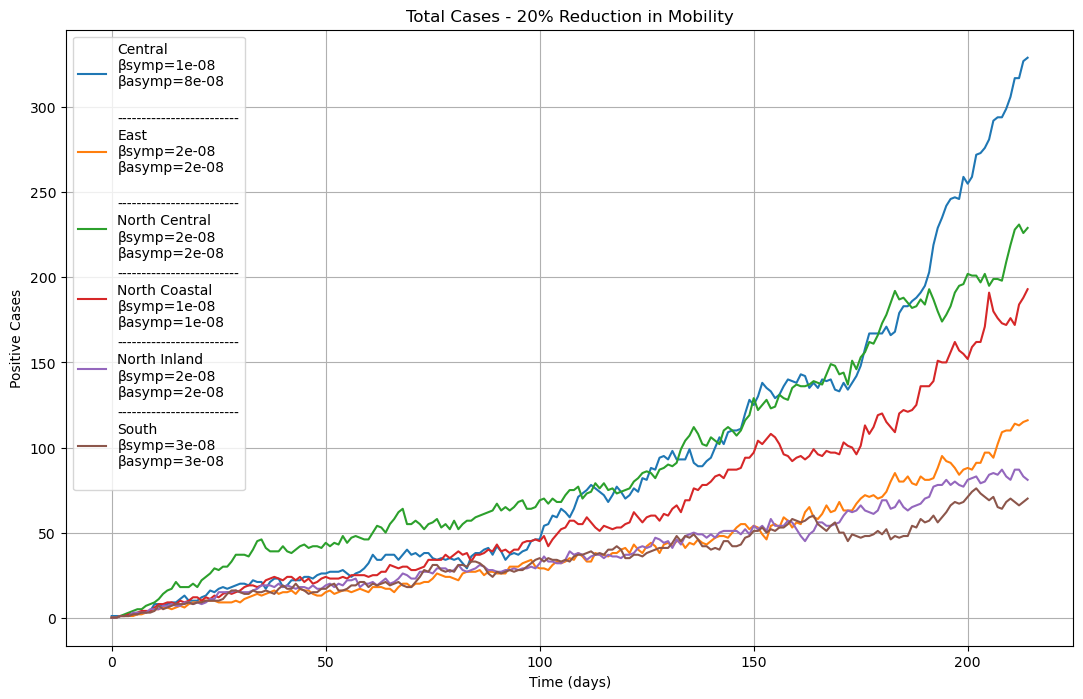

In [36]:
plot_total_result('Central', 'East', 'North Central', 'North Coastal', 'North Inland', 'South', \
                  central_high, east_high, north_central_high, north_coastal_high, north_inland_high, south_high, \
                  central_low, east_low, north_central_low, north_coastal_low, north_inland_low, south_low)